In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import pca
%matplotlib inline 
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import recall_score

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



# Read the Data Set and and understand the features and target variables
# Encode independent features

In [2]:
original_df=pd.read_csv('Qualitative_Bankruptcy.data.txt')

In [3]:
original_df.head()

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


In [10]:
original_df.shape

(249, 7)

In [11]:
original_df.dtypes

P      object
P.1    object
A      object
A.1    object
A.2    object
P.2    object
NB     object
dtype: object

In [12]:
original_df.isna().sum()
# Check for missing values

P      0
P.1    0
A      0
A.1    0
A.2    0
P.2    0
NB     0
dtype: int64

In [4]:
original_df=pd.get_dummies(original_df,prefix_sep='_',drop_first=True)
original_df.head()
# Encode the categorical variables using get_dummies. 
#The NB_NB is the dependent variable. The rest are independent variables

,P_N,P_P,P.1_N,P.1_P,A_N,A_P,A.1_N,A.1_P,A.2_N,A.2_P,P.2_N,P.2_P,NB_NB
0,1,0,1,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,1,0,1,0,1,0,1,0,1,1
3,1,0,1,0,0,1,0,1,0,1,1,0,1
4,0,0,0,0,0,1,0,1,0,1,0,0,1


In [5]:
original_df=original_df.astype(int)
#convert all the variables to type int

In [6]:
original_df.dtypes
#confirm that all the variables have got converted to integer

P_N      int64
P_P      int64
P.1_N    int64
P.1_P    int64
A_N      int64
A_P      int64
A.1_N    int64
A.1_P    int64
A.2_N    int64
A.2_P    int64
P.2_N    int64
P.2_P    int64
NB_NB    int64
dtype: object

In [67]:
original_df['NB_NB'].value_counts()
#check for distribution of the dependent variable

1    142
0    107
Name: NB_NB, dtype: int64

In [16]:
original_df.describe().transpose()
# 4 point summary

,count,mean,std,min,25%,50%,75%,max
P_N,249.0,0.357430,0.480208,0.0,0.0,0.0,1.0,1.0
P_P,249.0,0.317269,0.466351,0.0,0.0,0.0,1.0,1.0
P.1_N,249.0,0.477912,0.500518,0.0,0.0,0.0,1.0,1.0
P.1_P,249.0,0.244980,0.430942,0.0,0.0,0.0,0.0,1.0
A_N,249.0,0.477912,0.500518,0.0,0.0,0.0,1.0,1.0
A_P,249.0,0.228916,0.420981,0.0,0.0,0.0,0.0,1.0
A.1_N,249.0,0.377510,0.485740,0.0,0.0,0.0,1.0,1.0
A.1_P,249.0,0.317269,0.466351,0.0,0.0,0.0,1.0,1.0
A.2_N,249.0,0.413655,0.493480,0.0,0.0,0.0,1.0,1.0
A.2_P,249.0,0.365462,0.482529,0.0,0.0,0.0,1.0,1.0


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


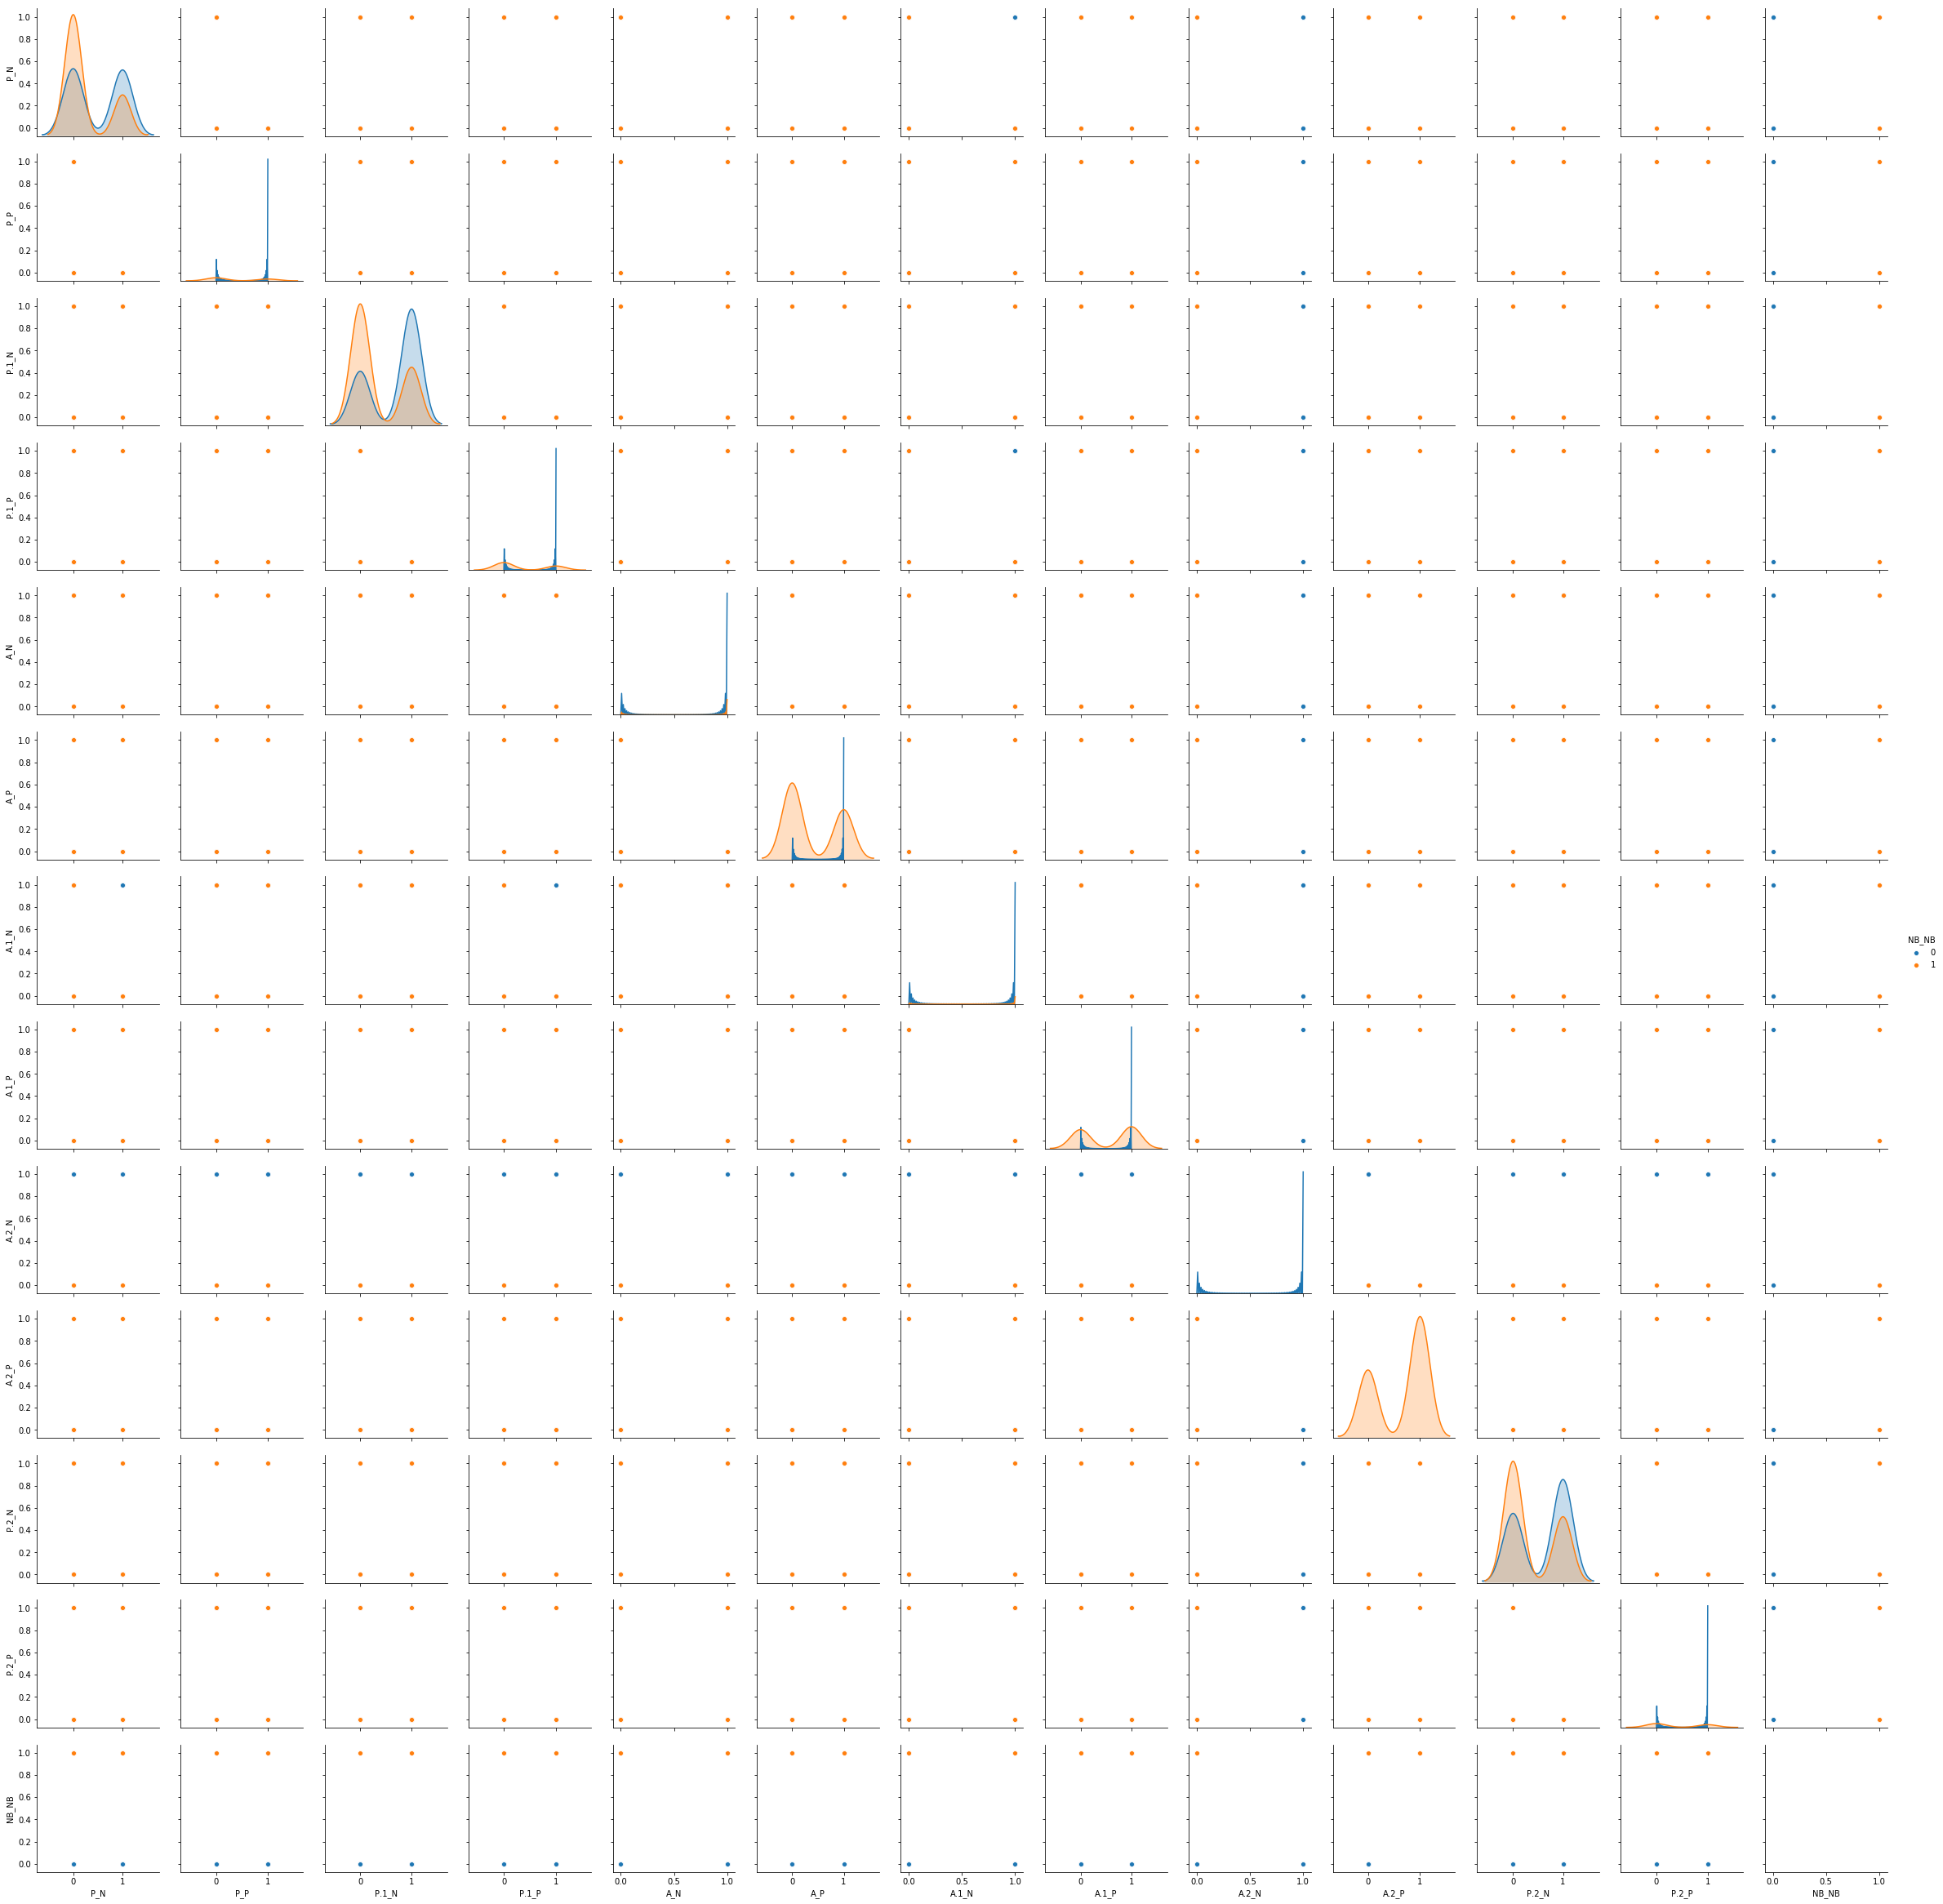

In [7]:
sns.pairplot(original_df,diag_kind='kde',hue='NB_NB')
# using the pair plot we can see that there are two distinct clusters.
# there does not appear to multi-collinearity between variables.


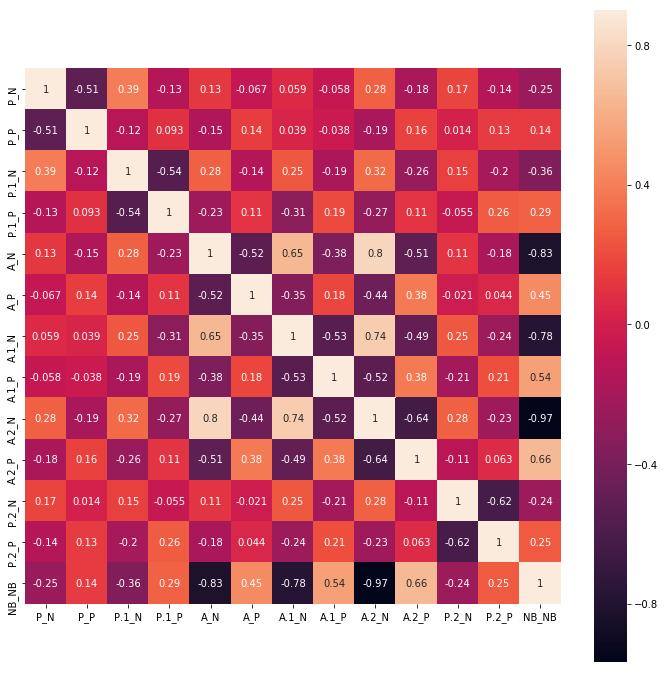

In [8]:
corr=original_df.corr()
plt.subplots(figsize=(12,12))

sns.heatmap(corr,vmax=0.9,square=True,annot=True)
# as observed through the pairplot, multi-collinearity is not pre-dominantly observed in this data set
# this means that the variables are fairly independent of each other.

Considering that the number of variables are not high, the variables are already independent of each other, at this stage, we need to question whether PCA really needed for this data set? 

# Separate the dependant variable from the rest of the train data 
# Split the dataset into training and test data ( Take 80:20 ratio)
# Apply PCA on the independent features of train data

In [9]:
X=original_df.iloc[:,0:12]
y=original_df.iloc[:,12]

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=99)

In [11]:

cov=X_train.cov()
cov

,P_N,P_P,P.1_N,P.1_P,A_N,A_P,A.1_N,A.1_P,A.2_N,A.2_P,P.2_N,P.2_P
P_N,0.230648,-0.115324,0.102990,-0.023730,0.028679,-0.016877,-0.000584,-0.015761,0.057154,-0.050733,0.034440,-0.030557
P_P,-0.115324,0.219278,-0.036343,0.019441,-0.039592,0.026115,0.012918,0.005355,-0.038678,0.048094,0.005507,0.030430
P.1_N,0.102990,-0.036343,0.251104,-0.108319,0.069413,-0.014948,0.040176,-0.026369,0.076164,-0.063550,0.038729,-0.044236
P.1_P,-0.023730,0.019441,-0.108319,0.173088,-0.039846,0.007538,-0.054566,0.031775,-0.050581,0.029592,-0.002842,0.045226
A_N,0.028679,-0.039592,0.069413,-0.039846,0.251256,-0.108040,0.157530,-0.090122,0.208162,-0.137963,0.018857,-0.027029
A_P,-0.016877,0.026115,-0.014948,0.007538,-0.108040,0.170245,-0.062738,0.033349,-0.093853,0.076900,0.004568,-0.003782
A.1_N,-0.000584,0.012918,0.040176,-0.054566,0.157530,-0.062738,0.237247,-0.119588,0.177554,-0.110502,0.057992,-0.043094
A.1_P,-0.015761,0.005355,-0.026369,0.031775,-0.090122,0.033349,-0.119588,0.215573,-0.120172,0.087153,-0.040277,0.038475
A.2_N,0.057154,-0.038678,0.076164,-0.050581,0.208162,-0.093853,0.177554,-0.120172,0.246637,-0.159332,0.059642,-0.042917
A.2_P,-0.050733,0.048094,-0.063550,0.029592,-0.137963,0.076900,-0.110502,0.087153,-0.159332,0.233440,-0.030887,0.011903


In [12]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.16768314  0.50380828  0.30821445 -0.21557258 -0.15774629 -0.14257854
  -0.33814564  0.09739133  0.37219822 -0.318638    0.40916839  0.00844724]
 [ 0.12439952 -0.35802631 -0.38053399  0.4271204  -0.04987286  0.18390056
  -0.4695375   0.13810487  0.44343878 -0.08807678  0.15865608 -0.15392077]
 [-0.24275024  0.42584749  0.1424442   0.57003839  0.0962492   0.16601
  -0.26185916 -0.33342427 -0.21672554  0.3720517   0.01627582 -0.11076827]
 [ 0.16082907 -0.19002335 -0.02061354 -0.55869235  0.11146423  0.0952669
  -0.42105278 -0.43500326  0.02634841  0.45023808  0.17849477  0.04669895]
 [-0.43149951 -0.21401219  0.12216002 -0.02411778 -0.55131869  0.26756736
   0.16104853  0.27688062  0.07490119  0.434295    0.19567759  0.20456313]
 [ 0.21017811  0.17589043 -0.18012121  0.16155853 -0.04591454 -0.43692833
  -0.15927131  0.12901802  0.09824639  0.24950868 -0.1521132   0.73230461]
 [-0.38667351 -0.25232596 -0.18928985  0.10622338 -0.10279737 -0.11578371
   0.07514511 -0.5

In [13]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 35.08906985  50.076569    63.09140188  72.1440586   78.11638821
  83.57778942  87.69444854  91.49911467  94.50282474  97.01055574
  98.98335251 100.        ]


# Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance

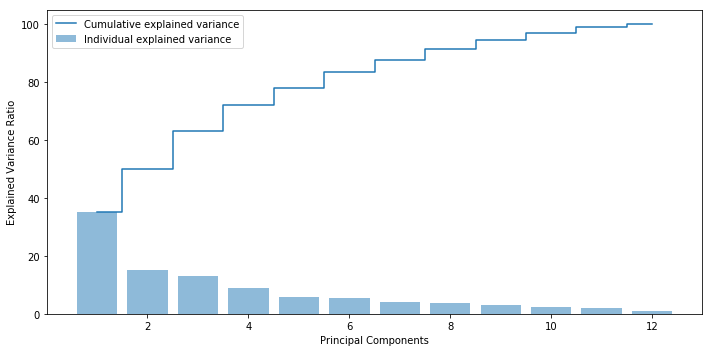

In [14]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# 9 variables cover 95% of the variance 

# Transform the data using PCA ( select optimum number of PCs)

In [15]:
# select the optimum number of PCs as 9- which explains 95% of the variance
pca = PCA(n_components=9)
X_train_transform=pca.fit_transform(X_train)
X_train_transform

array([[ 0.13972803,  1.25133337, -0.13573391, ...,  0.41664153,
        -0.21566765,  0.43289455],
       [ 1.61171096, -0.24498239, -0.41749103, ..., -0.10290756,
         0.78662741, -0.27491481],
       [ 0.46929247, -0.40488806, -0.38217351, ...,  0.46045611,
        -0.7189632 ,  0.03651384],
       ...,
       [-1.05006594,  0.75633251, -0.12291932, ...,  0.02423824,
        -0.2672851 , -0.27920931],
       [ 1.0028044 ,  0.46030018, -0.09497767, ..., -0.50205843,
         0.22640606, -0.37926308],
       [ 0.79948036, -0.02937518,  0.01250204, ..., -0.06650847,
        -0.56104474,  0.00184567]])

# Apply KMeans algorithm on the above transformed data

In [30]:
range= (1,2,3,4,5,6,7,8,9,10)
errors=[]
for i in range:
    clusters=KMeans(i,n_init=15, random_state=5)
    clusters.fit(X_train_transform)
    errors.append(clusters.inertia_)
clusters_df= pd.DataFrame({"num_of_clusters":range, "errors":errors})
clusters_df

,num_of_clusters,errors
0,1,503.030463
1,2,337.451616
2,3,289.878430
3,4,256.810976
4,5,230.253265
5,6,210.918206
6,7,197.431002
7,8,184.056390
8,9,174.124688
9,10,164.804135


# Select optimal number of clusters and form clusters out of the train data

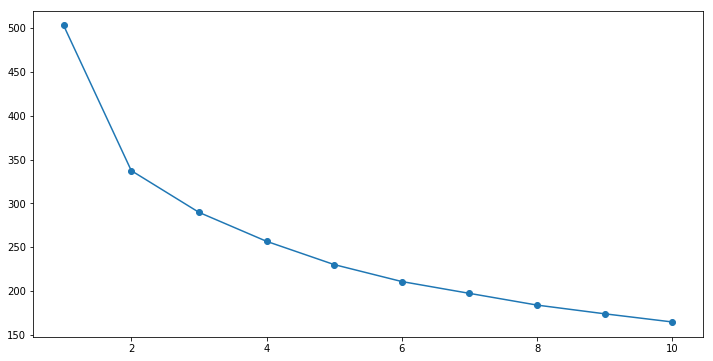

In [31]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df['num_of_clusters'], clusters_df['errors'], marker='o', )

In [32]:
cluster = KMeans(2,random_state=10) 
cluster_labels = cluster.fit_predict(X_train_transform)
silhouette_avg_2 = silhouette_score(X_train_transform, cluster_labels) 

cluster = KMeans(3,random_state=10) 
cluster_labels = cluster.fit_predict(X_train_transform)
silhouette_avg_3 = silhouette_score(X_train_transform, cluster_labels)

cluster = KMeans(4,random_state=10) 
cluster_labels = cluster.fit_predict(X_train_transform)
silhouette_avg_4 = silhouette_score(X_train_transform, cluster_labels)


print('silhouette_avg for 2 clusters is', silhouette_avg_2)
print('silhouette_avg for 3 clusters is', silhouette_avg_3)
print('silhouette_avg for 4 clusters is', silhouette_avg_4)

silhouette_avg for 2 clusters is 0.3069437840955052
silhouette_avg for 3 clusters is 0.2856384433638911
silhouette_avg for 4 clusters is 0.23733034366766578


# The optimum number of cluster is 2

In [16]:
clusters = KMeans( 2,n_init = 15, random_state=2)
clusters.fit(X_train_transform)
predict=clusters.predict(X_train_transform)
predict

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0], dtype=int32)

# Create a new column in the train data and populate it with the cluster labels

In [18]:
X_train['Group']=predict
#Create a new column 'Group' in the training data set( X_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
X_train.head()

,P_N,P_P,P.1_N,P.1_P,A_N,A_P,A.1_N,A.1_P,A.2_N,A.2_P,P.2_N,P.2_P,Group
121,1,0,1,0,0,0,0,1,0,0,1,0,0
81,0,0,0,1,0,1,0,1,0,1,0,1,0
24,0,1,1,0,0,0,0,0,0,0,0,1,0
147,1,0,1,0,1,0,0,0,1,0,0,0,1
133,1,0,0,1,0,0,0,0,0,0,1,0,0


# Transform the test data using the same PCA object that was fit on the train data

In [20]:
pca = PCA(n_components=9)
X_test_transform=pca.fit_transform(X_test)

In [21]:
predict_test=clusters.predict(X_test_transform)
predict_test

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1], dtype=int32)

# Use the same kmeans object, assign cluster labels to the test data and store it as a feature

In [22]:
X_test['Group']=predict_test

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
X_test.head()

,P_N,P_P,P.1_N,P.1_P,A_N,A_P,A.1_N,A.1_P,A.2_N,A.2_P,P.2_N,P.2_P,Group
244,1,0,1,0,0,0,1,0,1,0,1,0,0
236,1,0,0,1,1,0,1,0,1,0,1,0,0
40,1,0,0,0,0,1,0,1,0,1,1,0,1
191,0,1,1,0,1,0,1,0,0,0,0,0,0
156,0,1,1,0,1,0,1,0,0,0,0,0,0


# Apply SVC model on train dataset and predict target for test dataset
# Check accuracy and confusion matrix

In [25]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)



In [26]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9949748743718593
0.96


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix


print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[17  0]
 [ 2 31]]
